<a href="https://colab.research.google.com/github/iam-fern/Generate_multiplication_2X/blob/main/GQtest_cluster_data_multi_delta_(_2)_n250_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import os
import statistics as stats
import scipy.stats as ss
import scipy.stats as st
from scipy.stats import f_oneway
from scipy import stats
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import drive
from statsmodels.formula.api import ols
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_multiplication_2X/multiplication_delta_-2'

In [4]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_multi_delta_-2_n250.csv')

In [5]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,e,Y,y_hat,e_hat
0,0.0,0.0,93.037232,73.732146,0.012604,176.781982,176.769494,0.012488
1,0.0,1.0,96.280907,47.015596,-0.001956,153.294547,153.294889,-0.000342
2,0.0,2.0,53.471161,86.028099,-0.001603,149.497656,149.500574,-0.002917
3,0.0,3.0,37.582553,38.518570,0.020056,86.121178,86.099587,0.021591
4,0.0,4.0,33.017889,77.458845,-0.000890,120.475844,120.477719,-0.001876
...,...,...,...,...,...,...,...,...
249995,999.0,245.0,75.634299,51.861137,-0.011557,137.483879,137.495732,-0.011854
249996,999.0,246.0,65.245516,20.694635,0.001301,95.941452,95.941477,-0.000024
249997,999.0,247.0,81.723103,88.940795,-0.012453,180.651445,180.662581,-0.011136
249998,999.0,248.0,56.375293,60.024963,-0.000418,126.399838,126.398921,0.000917


In [6]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2         e           Y       y_hat     e_hat
rep   index                                                                  
0.0   0.0    93.037232  73.732146  0.012604  176.781982  176.769494  0.012488
      1.0    96.280907  47.015596 -0.001956  153.294547  153.294889 -0.000342
      2.0    53.471161  86.028099 -0.001603  149.497656  149.500574 -0.002917
      3.0    37.582553  38.518570  0.020056   86.121178   86.099587  0.021591
      4.0    33.017889  77.458845 -0.000890  120.475844  120.477719 -0.001876
...                ...        ...       ...         ...         ...       ...
999.0 245.0  75.634299  51.861137 -0.011557  137.483879  137.495732 -0.011854
      246.0  65.245516  20.694635  0.001301   95.941452   95.941477 -0.000024
      247.0  81.723103  88.940795 -0.012453  180.651445  180.662581 -0.011136
      248.0  56.375293  60.024963 -0.000418  126.399838  126.398921  0.000917
      249.0  81.908241  69.549727 -0.011669  161.446299  161.457704 -0.011405

[250000 rows x 6 columns]

In [7]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2         e           Y       y_hat     e_hat
rep   index                                                                  
0.0   0.0    93.037232  73.732146  0.012604  176.781982  176.769494  0.012488
      1.0    96.280907  47.015596 -0.001956  153.294547  153.294889 -0.000342
      2.0    53.471161  86.028099 -0.001603  149.497656  149.500574 -0.002917
      3.0    37.582553  38.518570  0.020056   86.121178   86.099587  0.021591
      4.0    33.017889  77.458845 -0.000890  120.475844  120.477719 -0.001876
...                ...        ...       ...         ...         ...       ...
999.0 245.0  75.634299  51.861137 -0.011557  137.483879  137.495732 -0.011854
      246.0  65.245516  20.694635  0.001301   95.941452   95.941477 -0.000024
      247.0  81.723103  88.940795 -0.012453  180.651445  180.662581 -0.011136
      248.0  56.375293  60.024963 -0.000418  126.399838  126.398921  0.000917
      249.0  81.908241  69.549727 -0.011669  161.446299  161.457704 -0.011405

[250000 rows x 6 columns]

In [8]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,e,Y,y_hat,e_hat
0,0.0,0.0,93.037232,73.732146,0.012604,176.781982,176.769494,0.012488
1,0.0,1.0,96.280907,47.015596,-0.001956,153.294547,153.294889,-0.000342
2,0.0,2.0,53.471161,86.028099,-0.001603,149.497656,149.500574,-0.002917
3,0.0,3.0,37.582553,38.518570,0.020056,86.121178,86.099587,0.021591
4,0.0,4.0,33.017889,77.458845,-0.000890,120.475844,120.477719,-0.001876
...,...,...,...,...,...,...,...,...
249995,999.0,245.0,75.634299,51.861137,-0.011557,137.483879,137.495732,-0.011854
249996,999.0,246.0,65.245516,20.694635,0.001301,95.941452,95.941477,-0.000024
249997,999.0,247.0,81.723103,88.940795,-0.012453,180.651445,180.662581,-0.011136
249998,999.0,248.0,56.375293,60.024963,-0.000418,126.399838,126.398921,0.000917


In [9]:
table.set_index(['rep', 'index'], inplace=True)

In [10]:
table

x1         x2         e           Y       y_hat     e_hat
rep   index                                                                  
0.0   0.0    93.037232  73.732146  0.012604  176.781982  176.769494  0.012488
      1.0    96.280907  47.015596 -0.001956  153.294547  153.294889 -0.000342
      2.0    53.471161  86.028099 -0.001603  149.497656  149.500574 -0.002917
      3.0    37.582553  38.518570  0.020056   86.121178   86.099587  0.021591
      4.0    33.017889  77.458845 -0.000890  120.475844  120.477719 -0.001876
...                ...        ...       ...         ...         ...       ...
999.0 245.0  75.634299  51.861137 -0.011557  137.483879  137.495732 -0.011854
      246.0  65.245516  20.694635  0.001301   95.941452   95.941477 -0.000024
      247.0  81.723103  88.940795 -0.012453  180.651445  180.662581 -0.011136
      248.0  56.375293  60.024963 -0.000418  126.399838  126.398921  0.000917
      249.0  81.908241  69.549727 -0.011669  161.446299  161.457704 -0.011405

[250000 rows x 6 columns]

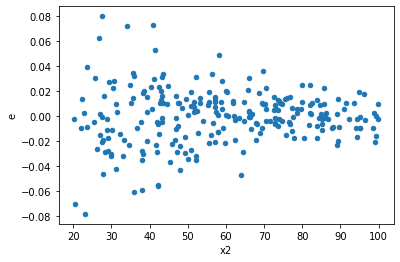

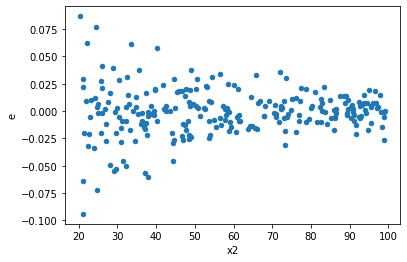

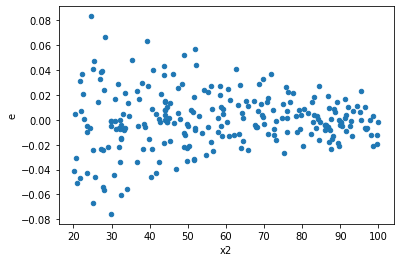

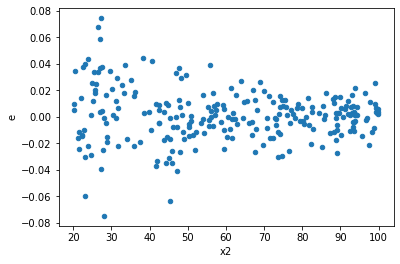

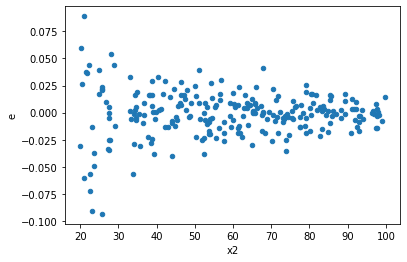

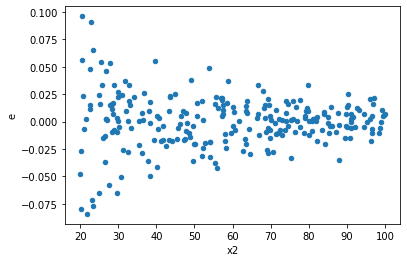

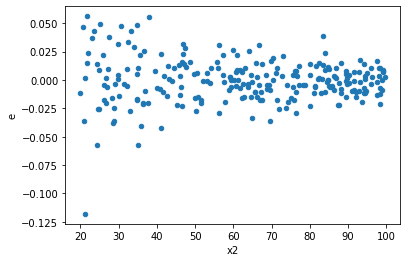

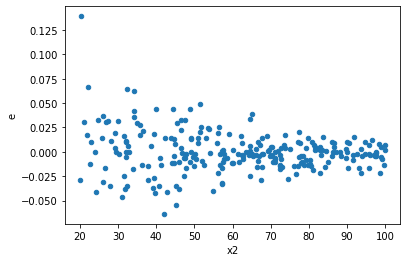

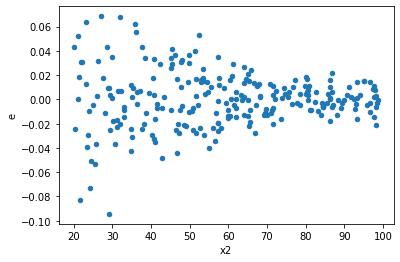

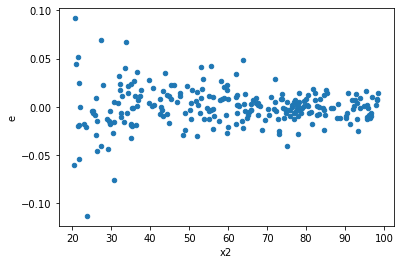

In [11]:
tablenew0 = table.loc[0.0]
tablenew1 = table.loc[1.0]
tablenew2 = table.loc[2.0]
tablenew3 = table.loc[3.0]
tablenew4 = table.loc[4.0]
tablenew5 = table.loc[5.0]
tablenew6 = table.loc[6.0]
tablenew7 = table.loc[7.0]
tablenew8 = table.loc[8.0]
tablenew9 = table.loc[9.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [12]:
def get_result(run_replicate):
    new_table = table.loc[run_replicate]

    # show index
    new_table.reset_index(inplace=True)

    new_table.drop(['index'], axis=1, inplace=True)

    # แบ่งข้อมูลออกเป็น 2 กลุ่มด้วย k-mean

    #Set number of clusters
    x = new_table[["x1", "x2"]]

    #Another important parameter is init, which defines the method initialization to use (default='k-means++').
    #k-means++ algorithm uses the seeding technique for centroid initialization which is better than the random initialization method.
    kmeans = KMeans(n_clusters=2, init='k-means++', random_state=0).fit(x)

    #Generate cluster predictions and store in y_kmeans
    y_kmeans = kmeans.predict(x)

    #kmean_clusters.astype(float)
    kmean_clusters = pd.DataFrame({"clusters" : y_kmeans})

    # เชื่อมข้อมูลทั้ง 2 DataFrame เข้าด้วยกันด้วยคำสั่ง pd.concat
    data_clusters = pd.concat([new_table, kmean_clusters], axis=1)
    #data_clusters.reset_index(inplace=True)

    # กลุ่มที่ 1
    data_cluster0 = data_clusters[data_clusters.clusters == 0]

    y = data_cluster0[['Y']]
    x = data_cluster0[['x1', 'x2']]
    x = sm.add_constant(x)
    model1 = sm.OLS(y, x).fit()

    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1

    # กลุ่มที่ 2
    data_cluster1 = data_clusters[data_clusters.clusters == 1]

    y = data_cluster1[['Y']]
    x = data_cluster1[['x1', 'x2']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()

    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # คำนวณค่าสถิติ
    GQ_test_clusters = (SSE2/DF2) / (SSE1/DF1)

    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test_clusters, df1, df2)))
    p_greater = ss.f.cdf(GQ_test_clusters, df1, df2)
    p_less = 1.0-ss.f.cdf(GQ_test_clusters, df1, df2)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test_clusters, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test_clusters=[]
list_result_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]
#list_result_test01=[]

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test_clusters, two_tailed, p_greater, p_less=get_result(run_replicate)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test_clusters.append(GQ_test_clusters)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future versi

In [13]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test_clusters,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,
0.0,128.0,118.0,0.057155552237027354,0.06075179646471204,0.0004465277518517762,0.000514845732751797,1.152998286482088,0.4332367387554885,0.7833816306222557,0.21661836937774426,Reject001=1 : Homoscedasticity
1.0,109.0,137.0,0.015956659736625613,0.10012545875577682,0.00014639137373051022,0.0007308427646407066,4.992389551491638,2.220446049250313e-16,0.9999999999999999,1.1102230246251565e-16,Reject001=0 : Heteroscedasticity
3.0,115.0,131.0,0.015117533440427357,0.07833418159674435,0.00013145681252545527,0.0005979708518835447,4.5488007840426965,4.440892098500626e-16,0.9999999999999998,2.220446049250313e-16,Reject001=0 : Heteroscedasticity
4.0,114.0,132.0,0.03867985165329925,0.07246659515434303,0.0003392969443271864,0.0005489893572298715,1.6180203400254536,0.007742994145553572,0.9961285029272232,0.003871497072776786,Reject001=0 : Heteroscedasticity
8.0,103.0,143.0,0.04670613545117672,0.08397746761782487,0.00045345762573957977,0.0005872550183064676,1.2950604091146711,0.15280333560170223,0.9235983321991489,0.07640166780085111,Reject001=1 : Homoscedasticity
11.0,111.0,135.0,0.01676429136754671,0.09862200592247931,0.00015102965195988027,0.0007305333772035505,4.83701953704833,2.220446049250313e-16,0.9999999999999999,1.1102230246251565e-16,Reject001=0 : Heteroscedasticity
12.0,120.0,126.0,0.016391728538394885,0.1166657710128326,0.00013659773781995739,0.0009259188175621634,6.778434491957476,2.220446049250313e-16,0.9999999999999999,1.1102230246251565e-16,Reject001=0 : Heteroscedasticity
13.0,128.0,118.0,0.04771143912433042,0.065808411093986,0.0003727456181588314,0.0005576983991015762,1.496190355922398,0.0269628023840649,0.9865185988079676,0.01348140119203245,Reject001=1 : Homoscedasticity
14.0,122.0,124.0,0.016711361893918027,0.10809749555997132,0.00013697837617965595,0.0008717539964513817,6.364172366213629,2.220446049250313e-16,0.9999999999999999,1.1102230246251565e-16,Reject001=0 : Heteroscedasticity


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                     if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test_clusters,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,128.0,118.0,0.057155552237027354,0.06075179646471204,0.0004465277518517762,0.000514845732751797,1.152998286482088,0.4332367387554885,Reject001=1 : Homoscedasticity
1.0,109.0,137.0,0.015956659736625613,0.10012545875577682,0.00014639137373051022,0.0007308427646407066,4.992389551491638,2.220446049250313e-16,Reject001=0 : Heteroscedasticity
2.0,138.0,108.0,0.11131174801068089,0.019427365400582364,0.0008066068696426152,0.00017988301296835522,0.2230120021765452,4.2794390964072947e-16,Reject001=0 : Heteroscedasticity
3.0,115.0,131.0,0.015117533440427357,0.07833418159674435,0.00013145681252545527,0.0005979708518835447,4.5488007840426965,4.440892098500626e-16,Reject001=0 : Heteroscedasticity
4.0,114.0,132.0,0.03867985165329925,0.07246659515434303,0.0003392969443271864,0.0005489893572298715,1.6180203400254536,0.007742994145553572,Reject001=0 : Heteroscedasticity
5.0,119.0,127.0,0.11973040879102544,0.027560280795653636,0.0010061378890002138,0.00021701008500514673,0.2156862268856477,7.904060788618759e-16,Reject001=0 : Heteroscedasticity
6.0,105.0,141.0,0.0706327947781915,0.023977626759655674,0.0006726932836018238,0.00017005409049401186,0.25279587984509916,1.8971638795088704e-12,Reject001=0 : Heteroscedasticity
7.0,123.0,123.0,0.07518373027124967,0.03581929060527787,0.0006112498396036558,0.0002912137447583567,0.4764234293250438,4.956253460961261e-05,Reject001=0 : Heteroscedasticity
8.0,103.0,143.0,0.04670613545117672,0.08397746761782487,0.00045345762573957977,0.0005872550183064676,1.2950604091146711,0.15280333560170223,Reject001=1 : Homoscedasticity


In [15]:
result_show['Result_test'].value_counts()

Reject001=0 : Heteroscedasticity    624
Reject001=1 : Homoscedasticity      376
Name: Result_test, dtype: int64